In [ ]:
!pip install --upgrade mlxtend


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 59.5 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
!pip install pymrmr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pymrmr: filename=pymrmr-0.1.11-cp310-cp310-linux_x86_64.whl size=352633 sha256=6dea19494af65ded18645e697a6329262bf2d005d26bfac9156486cc9accd3fc
  Stored in directory: /root/.cache/pip/wheels/46/ae/55/4a2479c5f0de7eb363fe970cb18e4a750e03e4e63b1b5c2005
Successfully built pymrmr


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
import pymrmr
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from numpy import mean
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

### Data Pre-processing

In [ ]:
from scipy.signal import filtfilt
from scipy import stats
import scipy
from sklearn.impute import SimpleImputer

def prepro(data):
  array_data = np.array(data)
  imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')
  sensor_data = imputer.fit_transform(array_data)
  # time = np.linspace(0, 5, 80000)
  # plt.plot(time, sensor_data)
  # plt.show()
  filtered_signal = bandPassFilter(sensor_data)
  # plt.plot(time, filtered_signal)
  # plt.show()

  return((filtered_signal))

def bandPassFilter(signal):
  fs = 4000.0
  lowcut = 20.0
  highcut = 450.0

  nyq = 0.5*fs
  low = lowcut / nyq
  high = highcut / nyq
  order = 5

  b,a = scipy.signal.butter(order, [low,high], "bandpass", analog=False)
  y = scipy.signal.filtfilt(b,a,signal,axis=0)

  return(y)

In [ ]:
cols = ["Muscle "+str(i) for i in range(1,9)]

### Correlation

In [ ]:
# # recon_data = np.matmul(W_synergy, H_coef)
#   label= np.full(64,num)
#   # correlation_1 = np.corrcoef(data_collected[0:8,:].flatten(), recon_data[0:8,:].flatten())[0][1]
#   # # correlation_2 = np.corrcoef(data_collected[8:16,:].flatten(), recon_data[8:16,:].flatten())[0][1]
#   # # correlation_3 = np.corrcoef(data_collected[16:24,:].flatten(), recon_data[16:24,:].flatten())[0][1]
#   # # correlation_4 = np.corrcoef(data_collected[24:32,:].flatten(), recon_data[24:32,:].flatten())[0][1]
#   # # correlation_5 = np.corrcoef(data_collected[32:40,:].flatten(), recon_data[32:40,:].flatten())[0][1]
#   # # correlation_6 = np.corrcoef(data_collected[40:48,:].flatten(), recon_data[40:48,:].flatten())[0][1]
#   # # correlation_7 = np.corrcoef(data_collected[48:56,:].flatten(), recon_data[48:56,:].flatten())[0][1]
#   # # correlation_8 = np.corrcoef(data_collected[56:64,:].flatten(), recon_data[56:64,:].flatten())[0][1]
#   # correlation = np.corrcoef(data_collected.flatten(), recon_data.flatten())
#   # l_corr = np.array([correlation_1, correlation_2, correlation_3, correlation_4, correlation_5, correlation_6, correlation_7, correlation_8])
#   # correlation = np.mean(l_corr)

### Sample - 1


In [ ]:
'''Posture-1 ii'''

S1ii_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/I_I1.csv', names=cols)).transpose()
S1ii_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/I_I1.csv', names=cols)).transpose()
S1ii_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/I_I1.csv', names=cols)).transpose()
S1ii_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/I_I1.csv', names=cols)).transpose()
S1ii_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/I_I1.csv', names=cols)).transpose()
S1ii_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/I_I1.csv', names=cols)).transpose()
S1ii_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/I_I1.csv', names=cols)).transpose()
S1ii_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/I_I1.csv', names=cols)).transpose()

ii_sample_1 = (np.concatenate([S1ii_1, S1ii_2, S1ii_3, S1ii_4, S1ii_5, S1ii_6, S1ii_7, S1ii_8], axis = 0))



'''Posture-2 tt'''

S1tt_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/T_T1.csv', names=cols)).transpose()
S1tt_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/T_T1.csv', names=cols)).transpose()
S1tt_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/T_T1.csv', names=cols)).transpose()
S1tt_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/T_T1.csv', names=cols)).transpose()
S1tt_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/T_T1.csv', names=cols)).transpose()
S1tt_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/T_T1.csv', names=cols)).transpose()
S1tt_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/T_T1.csv', names=cols)).transpose()
S1tt_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/T_T1.csv', names=cols)).transpose()

tt_sample_1 = (np.concatenate([S1tt_1, S1tt_2, S1tt_3, S1tt_4, S1tt_5, S1tt_6, S1tt_7, S1tt_8], axis = 0))




'''Posture-3 mm'''

S1mm_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/M_M1.csv', names=cols)).transpose()
S1mm_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/M_M1.csv', names=cols)).transpose()
S1mm_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/M_M1.csv', names=cols)).transpose()
S1mm_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/M_M1.csv', names=cols)).transpose()
S1mm_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/M_M1.csv', names=cols)).transpose()
S1mm_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/M_M1.csv', names=cols)).transpose()
S1mm_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/M_M1.csv', names=cols)).transpose()
S1mm_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/M_M1.csv', names=cols)).transpose()

mm_sample_1 = (np.concatenate([S1mm_1, S1mm_2, S1mm_3, S1mm_4, S1mm_5, S1mm_6, S1mm_7, S1mm_8], axis = 0))



'''Posture-4 rr'''

S1rr_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/R_R1.csv', names=cols)).transpose()
S1rr_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/R_R1.csv', names=cols)).transpose()
S1rr_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/R_R1.csv', names=cols)).transpose()
S1rr_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/R_R1.csv', names=cols)).transpose()
S1rr_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/R_R1.csv', names=cols)).transpose()
S1rr_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/R_R1.csv', names=cols)).transpose()
S1rr_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/R_R1.csv', names=cols)).transpose()
S1rr_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/R_R1.csv', names=cols)).transpose()

rr_sample_1 = (np.concatenate([S1rr_1, S1rr_2, S1rr_3, S1rr_4, S1rr_5, S1rr_6, S1rr_7, S1rr_8], axis = 0))




'''Posture-5 ll'''

S1ll_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/L_L1.csv', names=cols)).transpose()
S1ll_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/L_L1.csv', names=cols)).transpose()
S1ll_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/L_L1.csv', names=cols)).transpose()
S1ll_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/L_L1.csv', names=cols)).transpose()
S1ll_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/L_L1.csv', names=cols)).transpose()
S1ll_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/L_L1.csv', names=cols)).transpose()
S1ll_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/L_L1.csv', names=cols)).transpose()
S1ll_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/L_L1.csv', names=cols)).transpose()

ll_sample_1 = (np.concatenate([S1ll_1, S1ll_2, S1ll_3, S1ll_4, S1ll_5, S1ll_6, S1ll_7, S1ll_8], axis = 0))




'''Posture-6 ti'''

S1ti_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/T_I1.csv', names=cols)).transpose()
S1ti_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/T_I1.csv', names=cols)).transpose()
S1ti_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/T_I1.csv', names=cols)).transpose()
S1ti_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/T_I1.csv', names=cols)).transpose()
S1ti_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/T_I1.csv', names=cols)).transpose()
S1ti_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/T_I1.csv', names=cols)).transpose()
S1ti_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/T_I1.csv', names=cols)).transpose()
S1ti_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/T_I1.csv', names=cols)).transpose()

ti_sample_1 = (np.concatenate([S1ti_1, S1ti_2, S1ti_3, S1ti_4, S1ti_5, S1ti_6, S1ti_7, S1ti_8], axis = 0))



'''Posture-7 tm'''

S1tm_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/T_M1.csv', names=cols)).transpose()
S1tm_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/T_M1.csv', names=cols)).transpose()
S1tm_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/T_M1.csv', names=cols)).transpose()
S1tm_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/T_M1.csv', names=cols)).transpose()
S1tm_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/T_M1.csv', names=cols)).transpose()
S1tm_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/T_M1.csv', names=cols)).transpose()
S1tm_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/T_M1.csv', names=cols)).transpose()
S1tm_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/T_M1.csv', names=cols)).transpose()

tm_sample_1 = (np.concatenate([S1tm_1, S1tm_2, S1tm_3, S1tm_4, S1tm_5, S1tm_6, S1tm_7, S1tm_8], axis = 0))



'''Posture-8 tr'''

S1tr_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/T_R1.csv', names=cols)).transpose()
S1tr_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/T_R1.csv', names=cols)).transpose()
S1tr_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/T_R1.csv', names=cols)).transpose()
S1tr_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/T_R1.csv', names=cols)).transpose()
S1tr_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/T_R1.csv', names=cols)).transpose()
S1tr_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/T_R1.csv', names=cols)).transpose()
S1tr_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/T_R1.csv', names=cols)).transpose()
S1tr_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/T_R1.csv', names=cols)).transpose()

tr_sample_1 = (np.concatenate([S1tr_1, S1tr_2, S1tr_3, S1tr_4, S1tr_5, S1tr_6, S1tr_7, S1tr_8], axis = 0))


'''Posture-9 tl'''

S1tl_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/T_L1.csv', names=cols)).transpose()
S1tl_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/T_L1.csv', names=cols)).transpose()
S1tl_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/T_L1.csv', names=cols)).transpose()
S1tl_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/T_L1.csv', names=cols)).transpose()
S1tl_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/T_L1.csv', names=cols)).transpose()
S1tl_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/T_L1.csv', names=cols)).transpose()
S1tl_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/T_L1.csv', names=cols)).transpose()
S1tl_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/T_L1.csv', names=cols)).transpose()

tl_sample_1 = (np.concatenate([S1tl_1, S1tl_2, S1tl_3, S1tl_4, S1tl_5, S1tl_6, S1tl_7, S1tl_8], axis = 0))



'''Posture-10 im'''

S1im_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/I_M1.csv', names=cols)).transpose()
S1im_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/I_M1.csv', names=cols)).transpose()
S1im_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/I_M1.csv', names=cols)).transpose()
S1im_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/I_M1.csv', names=cols)).transpose()
S1im_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/I_M1.csv', names=cols)).transpose()
S1im_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/I_M1.csv', names=cols)).transpose()
S1im_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/I_M1.csv', names=cols)).transpose()
S1im_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/I_M1.csv', names=cols)).transpose()

im_sample_1 = (np.concatenate([S1im_1, S1im_2, S1im_3, S1im_4, S1im_5, S1im_6, S1im_7, S1im_8], axis = 0))


'''Posture-11 mr'''

S1mr_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/M_R1.csv', names=cols)).transpose()
S1mr_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/M_R1.csv', names=cols)).transpose()
S1mr_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/M_R1.csv', names=cols)).transpose()
S1mr_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/M_R1.csv', names=cols)).transpose()
S1mr_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/M_R1.csv', names=cols)).transpose()
S1mr_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/M_R1.csv', names=cols)).transpose()
S1mr_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/M_R1.csv', names=cols)).transpose()
S1mr_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/M_R1.csv', names=cols)).transpose()

mr_sample_1 = (np.concatenate([S1mr_1, S1mr_2, S1mr_3, S1mr_4, S1mr_5, S1mr_6, S1mr_7, S1mr_8], axis = 0))



'''Posture-12 rl'''

S1rl_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/R_L1.csv', names=cols)).transpose()
S1rl_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/R_L1.csv', names=cols)).transpose()
S1rl_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/R_L1.csv', names=cols)).transpose()
S1rl_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/R_L1.csv', names=cols)).transpose()
S1rl_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/R_L1.csv', names=cols)).transpose()
S1rl_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/R_L1.csv', names=cols)).transpose()
S1rl_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/R_L1.csv', names=cols)).transpose()
S1rl_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/R_L1.csv', names=cols)).transpose()

rl_sample_1 = (np.concatenate([S1rl_1, S1rl_2, S1rl_3, S1rl_4, S1rl_5, S1rl_6, S1rl_7, S1rl_8], axis = 0))


'''Posture-13 imr'''

S1imr_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/IMR1.csv', names=cols)).transpose()
S1imr_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/IMR1.csv', names=cols)).transpose()
S1imr_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/IMR1.csv', names=cols)).transpose()
S1imr_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/IMR1.csv', names=cols)).transpose()
S1imr_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/IMR1.csv', names=cols)).transpose()
S1imr_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/IMR1.csv', names=cols)).transpose()
S1imr_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/IMR1.csv', names=cols)).transpose()
S1imr_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/IMR1.csv', names=cols)).transpose()

imr_sample_1 = (np.concatenate([S1imr_1, S1imr_2, S1imr_3, S1imr_4, S1imr_5, S1imr_6, S1imr_7, S1imr_8], axis = 0))



'''Posture-14 mrl'''

S1mrl_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/MRL1.csv', names=cols)).transpose()
S1mrl_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/MRL1.csv', names=cols)).transpose()
S1mrl_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/MRL1.csv', names=cols)).transpose()
S1mrl_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/MRL1.csv', names=cols)).transpose()
S1mrl_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/MRL1.csv', names=cols)).transpose()
S1mrl_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/MRL1.csv', names=cols)).transpose()
S1mrl_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/MRL1.csv', names=cols)).transpose()
S1mrl_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/MRL1.csv', names=cols)).transpose()

mrl_sample_1 = (np.concatenate([S1mrl_1, S1mrl_2, S1mrl_3, S1mrl_4, S1mrl_5, S1mrl_6, S1mrl_7, S1mrl_8], axis = 0))



'''Posture-15 hc'''

S1hc_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/HC_1.csv', names=cols)).transpose()
S1hc_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/HC_1.csv', names=cols)).transpose()
S1hc_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/HC_1.csv', names=cols)).transpose()
S1hc_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/HC_1.csv', names=cols)).transpose()
S1hc_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/HC_1.csv', names=cols)).transpose()
S1hc_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/HC_1.csv', names=cols)).transpose()
S1hc_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/HC_1.csv', names=cols)).transpose()
S1hc_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/HC_1.csv', names=cols)).transpose()

hc_sample_1 = (np.concatenate([S1hc_1, S1hc_2, S1hc_3, S1hc_4, S1hc_5, S1hc_6, S1hc_7, S1hc_8], axis = 0))

# sample_1 = (np.concatenate([ii_sample_1, tt_sample_1, mm_sample_1, rr_sample_1, ll_sample_1, ti_sample_1, tm_sample_1, tr_sample_1, tl_sample_1, im_sample_1, mr_sample_1, rl_sample_1, imr_sample_1, mrl_sample_1, hc_sample_1], axis = 0))
# pd.DataFrame(sample_1)

### Sample - 2

In [ ]:
'''Posture-1 ii'''

S2ii_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/I_I2.csv', names=cols)).transpose()
S2ii_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/I_I2.csv', names=cols)).transpose()
S2ii_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/I_I2.csv', names=cols)).transpose()
S2ii_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/I_I2.csv', names=cols)).transpose()
S2ii_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/I_I2.csv', names=cols)).transpose()
S2ii_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/I_I2.csv', names=cols)).transpose()
S2ii_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/I_I2.csv', names=cols)).transpose()
S2ii_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/I_I2.csv', names=cols)).transpose()

ii_sample_2 = (np.concatenate([S2ii_2, S2ii_2, S2ii_3, S2ii_4, S2ii_5, S2ii_6, S2ii_7, S2ii_8], axis = 0))



'''Posture-2 tt'''

S2tt_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/T_T2.csv', names=cols)).transpose()
S2tt_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/T_T2.csv', names=cols)).transpose()
S2tt_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/T_T2.csv', names=cols)).transpose()
S2tt_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/T_T2.csv', names=cols)).transpose()
S2tt_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/T_T2.csv', names=cols)).transpose()
S2tt_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/T_T2.csv', names=cols)).transpose()
S2tt_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/T_T2.csv', names=cols)).transpose()
S2tt_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/T_T2.csv', names=cols)).transpose()

tt_sample_2 = (np.concatenate([S2tt_1, S2tt_2, S2tt_3, S2tt_4, S2tt_5, S2tt_6, S2tt_7, S2tt_8], axis = 0))




'''Posture-3 mm'''

S2mm_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/M_M2.csv', names=cols)).transpose()
S2mm_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/M_M2.csv', names=cols)).transpose()
S2mm_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/M_M2.csv', names=cols)).transpose()
S2mm_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/M_M2.csv', names=cols)).transpose()
S2mm_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/M_M2.csv', names=cols)).transpose()
S2mm_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/M_M2.csv', names=cols)).transpose()
S2mm_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/M_M2.csv', names=cols)).transpose()
S2mm_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/M_M2.csv', names=cols)).transpose()

mm_sample_2 = (np.concatenate([S2mm_1, S2mm_2, S2mm_3, S2mm_4, S2mm_5, S2mm_6, S2mm_7, S2mm_8], axis = 0))



'''Posture-4 rr'''

S2rr_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/R_R2.csv', names=cols)).transpose()
S2rr_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/R_R2.csv', names=cols)).transpose()
S2rr_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/R_R2.csv', names=cols)).transpose()
S2rr_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/R_R2.csv', names=cols)).transpose()
S2rr_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/R_R2.csv', names=cols)).transpose()
S2rr_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/R_R2.csv', names=cols)).transpose()
S2rr_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/R_R2.csv', names=cols)).transpose()
S2rr_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/R_R2.csv', names=cols)).transpose()

rr_sample_2 = (np.concatenate([S2rr_1, S2rr_2, S2rr_3, S2rr_4, S2rr_5, S2rr_6, S2rr_7, S2rr_8], axis = 0))




'''Posture-5 ll'''

S2ll_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/L_L2.csv', names=cols)).transpose()
S2ll_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/L_L2.csv', names=cols)).transpose()
S2ll_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/L_L2.csv', names=cols)).transpose()
S2ll_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/L_L2.csv', names=cols)).transpose()
S2ll_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/L_L2.csv', names=cols)).transpose()
S2ll_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/L_L2.csv', names=cols)).transpose()
S2ll_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/L_L2.csv', names=cols)).transpose()
S2ll_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/L_L2.csv', names=cols)).transpose()

ll_sample_2 = (np.concatenate([S2ll_1, S2ll_2, S2ll_3, S2ll_4, S2ll_5, S2ll_6, S2ll_7, S2ll_8], axis = 0))




'''Posture-6 ti'''

S2ti_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/T_I2.csv', names=cols)).transpose()
S2ti_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/T_I2.csv', names=cols)).transpose()
S2ti_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/T_I2.csv', names=cols)).transpose()
S2ti_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/T_I2.csv', names=cols)).transpose()
S2ti_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/T_I2.csv', names=cols)).transpose()
S2ti_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/T_I2.csv', names=cols)).transpose()
S2ti_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/T_I2.csv', names=cols)).transpose()
S2ti_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/T_I2.csv', names=cols)).transpose()

ti_sample_2 = (np.concatenate([S2ti_1, S2ti_2, S2ti_3, S2ti_4, S2ti_5, S2ti_6, S2ti_7, S2ti_8], axis = 0))



'''Posture-7 tm'''

S2tm_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/T_M2.csv', names=cols)).transpose()
S2tm_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/T_M2.csv', names=cols)).transpose()
S2tm_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/T_M2.csv', names=cols)).transpose()
S2tm_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/T_M2.csv', names=cols)).transpose()
S2tm_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/T_M2.csv', names=cols)).transpose()
S2tm_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/T_M2.csv', names=cols)).transpose()
S2tm_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/T_M2.csv', names=cols)).transpose()
S2tm_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/T_M2.csv', names=cols)).transpose()

tm_sample_2 = (np.concatenate([S2tm_1, S2tm_2, S2tm_3, S2tm_4, S2tm_5, S2tm_6, S2tm_7, S2tm_8], axis = 0))



'''Posture-8 tr'''

S2tr_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/T_R2.csv', names=cols)).transpose()
S2tr_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/T_R2.csv', names=cols)).transpose()
S2tr_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/T_R2.csv', names=cols)).transpose()
S2tr_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/T_R2.csv', names=cols)).transpose()
S2tr_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/T_R2.csv', names=cols)).transpose()
S2tr_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/T_R2.csv', names=cols)).transpose()
S2tr_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/T_R2.csv', names=cols)).transpose()
S2tr_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/T_R2.csv', names=cols)).transpose()

tr_sample_2 = (np.concatenate([S2tr_1, S2tr_2, S2tr_3, S2tr_4, S2tr_5, S2tr_6, S2tr_7, S2tr_8], axis = 0))


'''Posture-9 tl'''

S2tl_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/T_L2.csv', names=cols)).transpose()
S2tl_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/T_L2.csv', names=cols)).transpose()
S2tl_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/T_L2.csv', names=cols)).transpose()
S2tl_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/T_L2.csv', names=cols)).transpose()
S2tl_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/T_L2.csv', names=cols)).transpose()
S2tl_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/T_L2.csv', names=cols)).transpose()
S2tl_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/T_L2.csv', names=cols)).transpose()
S2tl_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/T_L2.csv', names=cols)).transpose()

tl_sample_2 = (np.concatenate([S2tl_1, S2tl_2, S2tl_3, S2tl_4, S2tl_5, S2tl_6, S2tl_7, S2tl_8], axis = 0))



'''Posture-10 im'''

S2im_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/I_M2.csv', names=cols)).transpose()
S2im_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/I_M2.csv', names=cols)).transpose()
S2im_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/I_M2.csv', names=cols)).transpose()
S2im_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/I_M2.csv', names=cols)).transpose()
S2im_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/I_M2.csv', names=cols)).transpose()
S2im_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/I_M2.csv', names=cols)).transpose()
S2im_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/I_M2.csv', names=cols)).transpose()
S2im_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/I_M2.csv', names=cols)).transpose()

im_sample_2 = (np.concatenate([S2im_1, S2im_2, S2im_3, S2im_4, S2im_5, S2im_6, S2im_7, S2im_8], axis = 0))


'''Posture-11 mr'''

S2mr_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/M_R2.csv', names=cols)).transpose()
S2mr_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/M_R2.csv', names=cols)).transpose()
S2mr_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/M_R2.csv', names=cols)).transpose()
S2mr_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/M_R2.csv', names=cols)).transpose()
S2mr_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/M_R2.csv', names=cols)).transpose()
S2mr_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/M_R2.csv', names=cols)).transpose()
S2mr_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/M_R2.csv', names=cols)).transpose()
S2mr_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/M_R2.csv', names=cols)).transpose()

mr_sample_2 = (np.concatenate([S2mr_1, S2mr_2, S2mr_3, S2mr_4, S2mr_5, S2mr_6, S2mr_7, S2mr_8], axis = 0))



'''Posture-12 rl'''

S2rl_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/R_L2.csv', names=cols)).transpose()
S2rl_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/R_L2.csv', names=cols)).transpose()
S2rl_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/R_L2.csv', names=cols)).transpose()
S2rl_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/R_L2.csv', names=cols)).transpose()
S2rl_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/R_L2.csv', names=cols)).transpose()
S2rl_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/R_L2.csv', names=cols)).transpose()
S2rl_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/R_L2.csv', names=cols)).transpose()
S2rl_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/R_L2.csv', names=cols)).transpose()

rl_sample_2 = (np.concatenate([S2rl_1, S2rl_2, S2rl_3, S2rl_4, S2rl_5, S2rl_6, S2rl_7, S2rl_8], axis = 0))


'''Posture-13 imr'''

S2imr_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/IMR2.csv', names=cols)).transpose()
S2imr_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/IMR2.csv', names=cols)).transpose()
S2imr_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/IMR2.csv', names=cols)).transpose()
S2imr_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/IMR2.csv', names=cols)).transpose()
S2imr_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/IMR2.csv', names=cols)).transpose()
S2imr_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/IMR2.csv', names=cols)).transpose()
S2imr_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/IMR2.csv', names=cols)).transpose()
S2imr_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/IMR2.csv', names=cols)).transpose()

imr_sample_2 = (np.concatenate([S2imr_1, S2imr_2, S2imr_3, S2imr_4, S2imr_5, S2imr_6, S2imr_7, S2imr_8], axis = 0))



'''Posture-14 mrl'''

S2mrl_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/MRL2.csv', names=cols)).transpose()
S2mrl_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/MRL2.csv', names=cols)).transpose()
S2mrl_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/MRL2.csv', names=cols)).transpose()
S2mrl_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/MRL2.csv', names=cols)).transpose()
S2mrl_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/MRL2.csv', names=cols)).transpose()
S2mrl_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/MRL2.csv', names=cols)).transpose()
S2mrl_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/MRL2.csv', names=cols)).transpose()
S2mrl_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/MRL2.csv', names=cols)).transpose()

mrl_sample_2 = (np.concatenate([S2mrl_1, S2mrl_2, S2mrl_3, S2mrl_4, S2mrl_5, S2mrl_6, S2mrl_7, S2mrl_8], axis = 0))



'''Posture-15 hc'''

S2hc_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/HC_2.csv', names=cols)).transpose()
S2hc_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/HC_2.csv', names=cols)).transpose()
S2hc_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/HC_2.csv', names=cols)).transpose()
S2hc_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/HC_2.csv', names=cols)).transpose()
S2hc_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/HC_2.csv', names=cols)).transpose()
S2hc_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/HC_2.csv', names=cols)).transpose()
S2hc_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/HC_2.csv', names=cols)).transpose()
S2hc_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/HC_2.csv', names=cols)).transpose()

hc_sample_2 = (np.concatenate([S2hc_1, S2hc_2, S2hc_3, S2hc_4, S2hc_5, S2hc_6, S2hc_7, S2hc_8], axis = 0))

# sample_2 = (np.concatenate([ii_sample_2, tt_sample_2, mm_sample_2, rr_sample_2, ll_sample_2, ti_sample_2, tm_sample_2, tr_sample_2, tl_sample_2, im_sample_2, mr_sample_2, rl_sample_2, imr_sample_2, mrl_sample_2, hc_sample_2], axis = 0))
# pd.DataFrame(sample_2)

### Sample - 3

In [ ]:
'''Posture-1 ii'''

S3ii_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/I_I3.csv', names=cols)).transpose()
S3ii_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/I_I3.csv', names=cols)).transpose()
S3ii_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/I_I3.csv', names=cols)).transpose()
S3ii_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/I_I3.csv', names=cols)).transpose()
S3ii_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/I_I3.csv', names=cols)).transpose()
S3ii_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/I_I3.csv', names=cols)).transpose()
S3ii_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/I_I3.csv', names=cols)).transpose()
S3ii_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/I_I3.csv', names=cols)).transpose()

ii_sample_3 = (np.concatenate([S3ii_2, S3ii_2, S3ii_3, S3ii_4, S3ii_5, S3ii_6, S3ii_7, S3ii_8], axis = 0))



'''Posture-2 tt'''

S3tt_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/T_T3.csv', names=cols)).transpose()
S3tt_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/T_T3.csv', names=cols)).transpose()
S3tt_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/T_T3.csv', names=cols)).transpose()
S3tt_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/T_T3.csv', names=cols)).transpose()
S3tt_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/T_T3.csv', names=cols)).transpose()
S3tt_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/T_T3.csv', names=cols)).transpose()
S3tt_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/T_T3.csv', names=cols)).transpose()
S3tt_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/T_T3.csv', names=cols)).transpose()

tt_sample_3 = (np.concatenate([S3tt_1, S3tt_2, S3tt_3, S3tt_4, S3tt_5, S3tt_6, S3tt_7, S3tt_8], axis = 0))




'''Posture-3 mm'''

S3mm_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/M_M3.csv', names=cols)).transpose()
S3mm_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/M_M3.csv', names=cols)).transpose()
S3mm_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/M_M3.csv', names=cols)).transpose()
S3mm_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/M_M3.csv', names=cols)).transpose()
S3mm_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/M_M3.csv', names=cols)).transpose()
S3mm_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/M_M3.csv', names=cols)).transpose()
S3mm_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/M_M3.csv', names=cols)).transpose()
S3mm_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/M_M3.csv', names=cols)).transpose()

mm_sample_3 = (np.concatenate([S3mm_1, S3mm_2, S3mm_3, S3mm_4, S3mm_5, S3mm_6, S3mm_7, S3mm_8], axis = 0))



'''Posture-4 rr'''

S3rr_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/R_R3.csv', names=cols)).transpose()
S3rr_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/R_R3.csv', names=cols)).transpose()
S3rr_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/R_R3.csv', names=cols)).transpose()
S3rr_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/R_R3.csv', names=cols)).transpose()
S3rr_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/R_R3.csv', names=cols)).transpose()
S3rr_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/R_R3.csv', names=cols)).transpose()
S3rr_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/R_R3.csv', names=cols)).transpose()
S3rr_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/R_R3.csv', names=cols)).transpose()

rr_sample_3 = (np.concatenate([S3rr_1, S3rr_2, S3rr_3, S3rr_4, S3rr_5, S3rr_6, S3rr_7, S3rr_8], axis = 0))




'''Posture-5 ll'''

S3ll_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/L_L3.csv', names=cols)).transpose()
S3ll_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/L_L3.csv', names=cols)).transpose()
S3ll_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/L_L3.csv', names=cols)).transpose()
S3ll_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/L_L3.csv', names=cols)).transpose()
S3ll_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/L_L3.csv', names=cols)).transpose()
S3ll_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/L_L3.csv', names=cols)).transpose()
S3ll_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/L_L3.csv', names=cols)).transpose()
S3ll_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/L_L3.csv', names=cols)).transpose()

ll_sample_3 = (np.concatenate([S3ll_1, S3ll_2, S3ll_3, S3ll_4, S3ll_5, S3ll_6, S3ll_7, S3ll_8], axis = 0))




'''Posture-6 ti'''

S3ti_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/T_I3.csv', names=cols)).transpose()
S3ti_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/T_I3.csv', names=cols)).transpose()
S3ti_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/T_I3.csv', names=cols)).transpose()
S3ti_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/T_I3.csv', names=cols)).transpose()
S3ti_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/T_I3.csv', names=cols)).transpose()
S3ti_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/T_I3.csv', names=cols)).transpose()
S3ti_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/T_I3.csv', names=cols)).transpose()
S3ti_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/T_I3.csv', names=cols)).transpose()

ti_sample_3 = (np.concatenate([S3ti_1, S3ti_2, S3ti_3, S3ti_4, S3ti_5, S3ti_6, S3ti_7, S3ti_8], axis = 0))



'''Posture-7 tm'''

S3tm_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/T_M3.csv', names=cols)).transpose()
S3tm_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/T_M3.csv', names=cols)).transpose()
S3tm_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/T_M3.csv', names=cols)).transpose()
S3tm_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/T_M3.csv', names=cols)).transpose()
S3tm_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/T_M3.csv', names=cols)).transpose()
S3tm_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/T_M3.csv', names=cols)).transpose()
S3tm_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/T_M3.csv', names=cols)).transpose()
S3tm_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/T_M3.csv', names=cols)).transpose()

tm_sample_3 = (np.concatenate([S3tm_1, S3tm_2, S3tm_3, S3tm_4, S3tm_5, S3tm_6, S3tm_7, S3tm_8], axis = 0))



'''Posture-8 tr'''

S3tr_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/T_R3.csv', names=cols)).transpose()
S3tr_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/T_R3.csv', names=cols)).transpose()
S3tr_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/T_R3.csv', names=cols)).transpose()
S3tr_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/T_R3.csv', names=cols)).transpose()
S3tr_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/T_R3.csv', names=cols)).transpose()
S3tr_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/T_R3.csv', names=cols)).transpose()
S3tr_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/T_R3.csv', names=cols)).transpose()
S3tr_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/T_R3.csv', names=cols)).transpose()

tr_sample_3 = (np.concatenate([S3tr_1, S3tr_2, S3tr_3, S3tr_4, S3tr_5, S3tr_6, S3tr_7, S3tr_8], axis = 0))


'''Posture-9 tl'''

S3tl_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/T_L3.csv', names=cols)).transpose()
S3tl_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/T_L3.csv', names=cols)).transpose()
S3tl_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/T_L3.csv', names=cols)).transpose()
S3tl_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/T_L3.csv', names=cols)).transpose()
S3tl_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/T_L3.csv', names=cols)).transpose()
S3tl_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/T_L3.csv', names=cols)).transpose()
S3tl_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/T_L3.csv', names=cols)).transpose()
S3tl_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/T_L3.csv', names=cols)).transpose()

tl_sample_3 = (np.concatenate([S3tl_1, S3tl_2, S3tl_3, S3tl_4, S3tl_5, S3tl_6, S3tl_7, S3tl_8], axis = 0))



'''Posture-10 im'''

S3im_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/I_M3.csv', names=cols)).transpose()
S3im_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/I_M3.csv', names=cols)).transpose()
S3im_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/I_M3.csv', names=cols)).transpose()
S3im_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/I_M3.csv', names=cols)).transpose()
S3im_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/I_M3.csv', names=cols)).transpose()
S3im_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/I_M3.csv', names=cols)).transpose()
S3im_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/I_M3.csv', names=cols)).transpose()
S3im_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/I_M3.csv', names=cols)).transpose()

im_sample_3 = (np.concatenate([S3im_1, S3im_2, S3im_3, S3im_4, S3im_5, S3im_6, S3im_7, S3im_8], axis = 0))


'''Posture-11 mr'''

S3mr_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/M_R3.csv', names=cols)).transpose()
S3mr_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/M_R3.csv', names=cols)).transpose()
S3mr_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/M_R3.csv', names=cols)).transpose()
S3mr_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/M_R3.csv', names=cols)).transpose()
S3mr_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/M_R3.csv', names=cols)).transpose()
S3mr_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/M_R3.csv', names=cols)).transpose()
S3mr_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/M_R3.csv', names=cols)).transpose()
S3mr_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/M_R3.csv', names=cols)).transpose()

mr_sample_3 = (np.concatenate([S3mr_1, S3mr_2, S3mr_3, S3mr_4, S3mr_5, S3mr_6, S3mr_7, S3mr_8], axis = 0))



'''Posture-12 rl'''

S3rl_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/R_L3.csv', names=cols)).transpose()
S3rl_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/R_L3.csv', names=cols)).transpose()
S3rl_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/R_L3.csv', names=cols)).transpose()
S3rl_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/R_L3.csv', names=cols)).transpose()
S3rl_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/R_L3.csv', names=cols)).transpose()
S3rl_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/R_L3.csv', names=cols)).transpose()
S3rl_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/R_L3.csv', names=cols)).transpose()
S3rl_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/R_L3.csv', names=cols)).transpose()

rl_sample_3 = (np.concatenate([S3rl_1, S3rl_2, S3rl_3, S3rl_4, S3rl_5, S3rl_6, S3rl_7, S3rl_8], axis = 0))


'''Posture-13 imr'''

S3imr_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/IMR3.csv', names=cols)).transpose()
S3imr_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/IMR3.csv', names=cols)).transpose()
S3imr_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/IMR3.csv', names=cols)).transpose()
S3imr_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/IMR3.csv', names=cols)).transpose()
S3imr_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/IMR3.csv', names=cols)).transpose()
S3imr_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/IMR3.csv', names=cols)).transpose()
S3imr_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/IMR3.csv', names=cols)).transpose()
S3imr_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/IMR3.csv', names=cols)).transpose()

imr_sample_3 = (np.concatenate([S3imr_1, S3imr_2, S3imr_3, S3imr_4, S3imr_5, S3imr_6, S3imr_7, S3imr_8], axis = 0))



'''Posture-14 mrl'''

S3mrl_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/MRL3.csv', names=cols)).transpose()
S3mrl_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/MRL3.csv', names=cols)).transpose()
S3mrl_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/MRL3.csv', names=cols)).transpose()
S3mrl_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/MRL3.csv', names=cols)).transpose()
S3mrl_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/MRL3.csv', names=cols)).transpose()
S3mrl_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/MRL3.csv', names=cols)).transpose()
S3mrl_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/MRL3.csv', names=cols)).transpose()
S3mrl_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/MRL3.csv', names=cols)).transpose()

mrl_sample_3 = (np.concatenate([S3mrl_1, S3mrl_2, S3mrl_3, S3mrl_4, S3mrl_5, S3mrl_6, S3mrl_7, S3mrl_8], axis = 0))



'''Posture-15 hc'''

S3hc_1 = prepro(pd.read_csv('drive/MyDrive/S1-15Class/HC_3.csv', names=cols)).transpose()
S3hc_2 = prepro(pd.read_csv('drive/MyDrive/S2-15Class/HC_3.csv', names=cols)).transpose()
S3hc_3 = prepro(pd.read_csv('drive/MyDrive/S3-15Class/HC_3.csv', names=cols)).transpose()
S3hc_4 = prepro(pd.read_csv('drive/MyDrive/S4-15Class/HC_3.csv', names=cols)).transpose()
S3hc_5 = prepro(pd.read_csv('drive/MyDrive/S5-15Class/HC_3.csv', names=cols)).transpose()
S3hc_6 = prepro(pd.read_csv('drive/MyDrive/S6-15Class/HC_3.csv', names=cols)).transpose()
S3hc_7 = prepro(pd.read_csv('drive/MyDrive/S7-15Class/HC_3.csv', names=cols)).transpose()
S3hc_8 = prepro(pd.read_csv('drive/MyDrive/S8-15Class/HC_3.csv', names=cols)).transpose()

hc_sample_3 = (np.concatenate([S3hc_1, S3hc_2, S3hc_3, S3hc_4, S3hc_5, S3hc_6, S3hc_7, S3hc_8], axis = 0))

# sample_3 = (np.concatenate([ii_sample_3, tt_sample_3, mm_sample_3, rr_sample_3, ll_sample_3, ti_sample_3, tm_sample_3, tr_sample_3, tl_sample_3, im_sample_3, mr_sample_3, rl_sample_3, imr_sample_3, mrl_sample_3, hc_sample_3], axis = 0))
# pd.DataFrame(sample_3)

### Synergy Extraction and labelling

In [ ]:
def synergycalc(data_collected,num):

  # Scaling of the values between 0 and 10 (making the values non-negative)
  min_max_scaler = MinMaxScaler(feature_range=(0, 10))
  data_collected = min_max_scaler.fit_transform(data_collected)

  # Computation of NMF
  n=5
  model = NMF(n_components=n, max_iter=3000)
  W_synergy = model.fit_transform(data_collected)  # The Synergy Matrix
  H_coef = model.components_  # The Coefficient Matrix

  # Flattening the synergies from 2D to 1D for labelling
  data1 = W_synergy[0:8,:].flatten()
  data2 = W_synergy[8:16,:].flatten()
  data3 = W_synergy[16:24,:].flatten()
  data4 = W_synergy[24:32,:].flatten()
  data5 = W_synergy[32:40,:].flatten()
  data6 = W_synergy[40:48,:].flatten()
  data7 = W_synergy[48:56,:].flatten()
  data8 = W_synergy[56:64,:].flatten()

  # Labelling of the classes
  synergy_data = np.vstack((np.insert(data1, 0, num), np.insert(data2, 0, num),
                                np.insert(data3, 0, num), np.insert(data4, 0, num),
                                  np.insert(data5, 0, num), np.insert(data6, 0, num),
                                 np.insert(data7, 0, num), np.insert(data8, 0, num)))

  return(synergy_data)

### Synergy Calculation

In [ ]:
ti = synergycalc(np.concatenate((ti_sample_1,ti_sample_2,ti_sample_3),axis = 1),0)
tm = synergycalc(np.concatenate((tm_sample_1,tm_sample_2,tm_sample_3),axis = 1),1)
tr = synergycalc(np.concatenate((tr_sample_1,tr_sample_2,tr_sample_3),axis = 1),2)
tl = synergycalc(np.concatenate((tl_sample_1,tl_sample_2,tl_sample_3),axis = 1),3)
im = synergycalc(np.concatenate((im_sample_1,im_sample_2,im_sample_3),axis = 1),4)
mr = synergycalc(np.concatenate((mr_sample_1,mr_sample_2,mr_sample_3),axis = 1),5)
rl = synergycalc(np.concatenate((rl_sample_1,rl_sample_2,rl_sample_3),axis = 1),6)
imr = synergycalc(np.concatenate((imr_sample_1,imr_sample_2,imr_sample_3),axis = 1),7)
mrl = synergycalc(np.concatenate((mrl_sample_1,mrl_sample_2,mrl_sample_3),axis = 1),8)
hc = synergycalc(np.concatenate((hc_sample_1,hc_sample_2,hc_sample_3),axis = 1),9)
ii = synergycalc(np.concatenate((ii_sample_1,ii_sample_2,ii_sample_3),axis = 1),10)
tt = synergycalc(np.concatenate((tt_sample_1,tt_sample_2,tt_sample_3),axis = 1),11)
mm = synergycalc(np.concatenate((mm_sample_1,mm_sample_2,mm_sample_3),axis = 1),12)
rr = synergycalc(np.concatenate((rr_sample_1,rr_sample_2,rr_sample_3),axis = 1),13)
ll = synergycalc(np.concatenate((ll_sample_1,ll_sample_2,ll_sample_3),axis = 1),14)

# min_max_scaler = MinMaxScaler(feature_range=(0, 10))
# final_matrix = min_max_scaler.fit_transform(final_matrix)
# pd.DataFrame(final_matrix)

0 0.0865035743393535
1 0.24792569038234544
2 0.41705065775820754
4 0.5031716170767722
3 0.5209374221543436
5 0.5586254032859577
6 0.6378487965897696
11 0.6424628674404281
12 0.6509447155922141
7 0.6646930546852164
8 0.6671987354374261
14 0.67004339061333
10 0.671664535917168
9 0.6733859308867031
13 0.6882475018838258


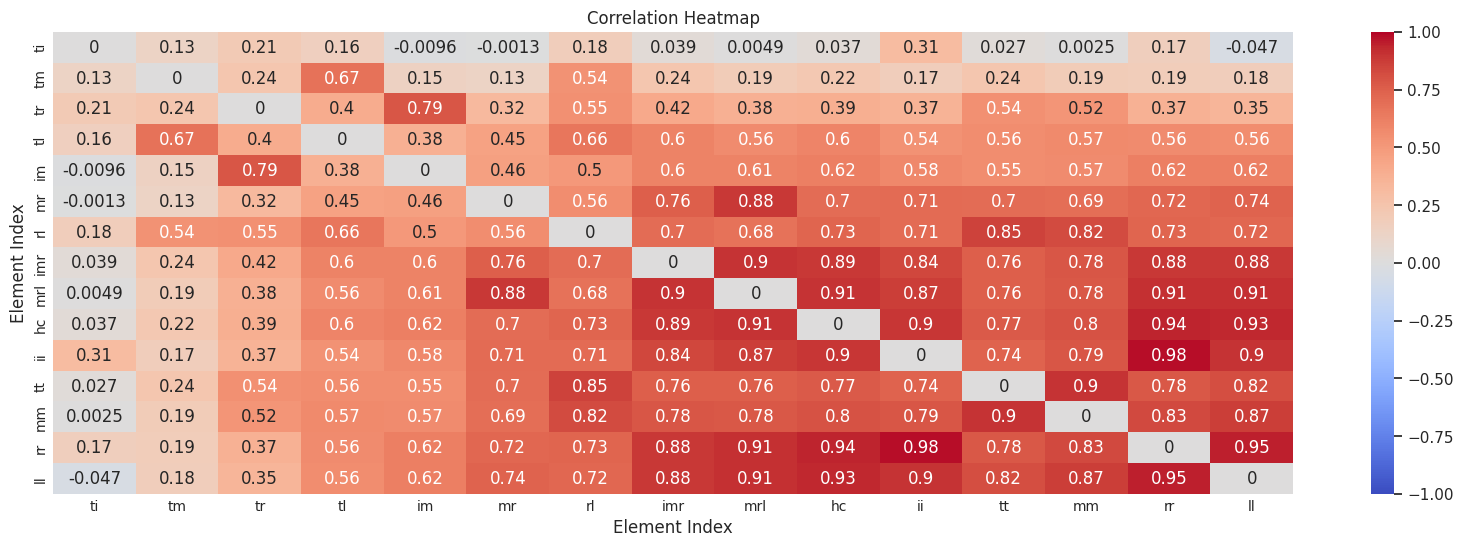

In [ ]:
arr = np.array([ti,tm,tr,tl,im,mr,rl,imr,mrl,hc, ii, tt, mm, rr, ll])
avg={}
correlations = {}

labels = ['ti', 'tm', 'tr', 'tl', 'im', 'mr', 'rl', 'imr', 'mrl', 'hc', 'ii', 'tt', 'mm', 'rr', 'll']

for i in range(len(arr)):
    sum_corr = 0.0
    count_corr = 0
    for j in range(len(arr)):
      if i!=j:
        corr = np.corrcoef(arr[i].flatten(), arr[j].flatten())[0][1]
        correlations[i,j]=corr
        sum_corr += corr
        count_corr += 1

    avg_corr = sum_corr / count_corr
    avg[i]=avg_corr

sorted_dict = dict(sorted(avg.items(), key=lambda x: x[1]))

for keys in (sorted_dict.keys()):
  print(keys,sorted_dict[keys])


# for i in range(len(arr)):


# for i in (correlations.keys()):
#   print(i,correlations[i])

# l=0
# for k in (avg):
#   print(l,k)
#   l+=1

correlation_matrix = np.zeros((len(arr), len(arr)))
for (i, j), corr in correlations.items():
    correlation_matrix[i, j] = corr

# Create the heatmap using seaborn
sns.set()
plt.figure(figsize=(20, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.xlabel('Element Index')
plt.ylabel('Element Index')
plt.tick_params(axis='both', which='both', length=0, labelsize=10, pad=4)
plt.xticks(np.arange(len(labels)) + 0.5, labels, ha='center')
plt.yticks(np.arange(len(labels)) + 0.5, labels, va='center')
plt.show()

In [ ]:
final_matrix = (np.concatenate((ti,tm,tr,tl,im,mr,rl,imr,mrl,hc, ii, tt, mm, rr, ll),axis = 0))

not_discretized_data = final_matrix.copy()



In [ ]:
# This combination is giving 88 % accuracy
# final_matrix = (np.concatenate((tm,ti,tr, im,mr,hc,tt,rr),axis = 0))
# removed = [tm, tl, mm, mrl, ll, rl, ii, imr] -> 0.88

# Removing tt decreased accuracy first -> 0.80
# Removing tr decreased accuracy second -> 0.78
# Removing ii increased accuracy first -> 0.81
# Including tr increased accuracy first -> 0.81
# Including tt increased accuracy second -> 0.84
# Removing imr -> 0.88


# This combination is giving 90 % accuracy
# final_matrix = (np.concatenate(( ll, rl, ii, imr),axis = 0))
# removed = [tl, tm, mrl,  mm] -> 0.90



# This combination is giving 91 % accuracy
# final_matrix = (np.concatenate((tl,  mrl, mm),axis = 0))
# removed = [tm] -> 0.91


# final_matrix = (np.concatenate((ti,tr,im,mr,rl,imr,hc, ii, tt, rr),axis = 0))    #-> 79 % accuracy
# removed = tm, tl, mm, mrl, ll
# When mrl was removed for second time, accuracy increased


# Removing tt decreased accuracy first -> 0.80
# Removing tr decreased accuracy second -> 0.78
# Removing ii increased accuracy first -> 0.81

# final_matrix = (np.concatenate((ti,tm,tr,im,mr,rl,imr,mrl,hc, ii, tt, mm, rr, ll),axis = 0))



# Correlation of tm - 0.24
# Correlation of tl - 0.521
# Correlation of mm - 0.65
# Correlation of mrl - 0.66

In [ ]:
# # Extract the labels and features from the dataset
# labels = final_matrix[:, 0]  # Assuming the labels are in the first column
# features = final_matrix[:, 1:]  # Assuming the features start from the second column

# num_features = features.shape[1]
# num_rows = int(np.ceil(num_features / 5))  # Number of rows in the subplot grid
# fig, axes = plt.subplots(num_rows, 5, figsize=(15, 3 * num_rows))  # Adjust the figsize as per your preference

# # Get unique class labels and assign colors
# unique_labels = np.unique(labels)
# class_colors = plt.cm.tab20(np.linspace(0, 1, len(unique_labels)))  # Use plt.cm.tab20 instead of plt.cm.get_cmap

# for i in range(num_features):
#     row = i // 5  # Calculate the row index of the subplot
#     col = i % 5  # Calculate the column index of the subplot
#     ax = axes[row, col] if num_rows > 1 else axes[col]  # Get the appropriate axis for the subplot

#     feature = features[:, i]
#     for j, class_label in enumerate(unique_labels):
#         class_indices = np.where(labels == class_label)[0]
#         class_feature = feature[class_indices]
#         ax.scatter(class_indices, class_feature, color=class_colors[j], label=str(class_label), alpha=0.5)

#     ax.set_xlabel('Data Point Index')
#     ax.set_ylabel('Feature {}'.format(i+1))
#     ax.set_title('Feature {}'.format(i+1))
#     ax.legend()

# # If the number of features is not a multiple of 5, remove the empty subplots
# if num_features % 5 != 0:
#     empty_subplots = num_rows * 5 - num_features
#     fig.delaxes(axes[-1, -empty_subplots:])

# plt.tight_layout()
# plt.show()

# Correlation

In [ ]:
# def correlation(arr1, arr2):
#   corr = np.corrcoef(arr1.flatten(), arr2.flatten())[1][0]
#   return corr

In [ ]:
colnames = ["a-"+str(i) for i in range(1,41)]

##PCA

In [ ]:
# pca_components = 20

# colnames = ["a-"+str(i) for i in range(1,pca_components+1)]

# df1 = pd.DataFrame(data = not_discretized_data)
# X = df1.iloc[:,1:].values
# pca = PCA(n_components = pca_components)
# X = pca.fit_transform(X)
# pd.DataFrame(X)
# # # X = TSNE(n_components=3, perplexity=8, n_iter=1500).fit_transform(X)

# Feature Selection


In [ ]:
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform').fit(final_matrix[:, 1:])
final_matrix[:, 1:] = trans.transform(final_matrix[:, 1:])

df = pd.DataFrame(data = final_matrix, columns=["class"]+colnames)
# print(colnames)
selected_features = pymrmr.mRMR(df, 'MID', 12)
df1 = pd.DataFrame(data = not_discretized_data, columns=["class"]+colnames)
X = df1.loc[:,selected_features].values
y = not_discretized_data[:,0]
y = np.array(y, dtype=np.int32)
selected_features

['a-15',
 'a-12',
 'a-18',
 'a-16',
 'a-19',
 'a-20',
 'a-14',
 'a-11',
 'a-17',
 'a-13',
 'a-35',
 'a-10']

In [ ]:
pd.DataFrame(X)
#(7, 14, 15, 18, 19)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.691769,0.021667,0.010065,0.623858,0.279772,0.694412,0.283517,0.610861,0.021758,0.010030,0.711538,0.778346
1,0.695041,0.021636,0.009728,0.595292,0.282225,0.699590,0.281660,0.611270,0.021013,0.009031,0.563213,0.640902
2,0.723469,0.023456,0.008309,0.624578,0.274735,0.700003,0.240239,0.679088,0.022296,0.009415,0.716845,0.725905
3,0.690632,0.027352,0.009770,0.587931,0.250712,0.710519,0.243702,0.582016,0.023959,0.007990,0.733699,0.536073
4,0.693700,0.028321,0.005664,0.534544,0.375524,0.589444,0.253096,0.602991,0.021763,0.001690,0.713555,0.666154
...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.371366,0.025536,0.044643,0.428731,0.221257,0.374576,0.221057,0.433791,0.026528,0.045431,0.369369,0.365553
116,0.368150,0.031151,0.042132,0.406001,0.209700,0.361851,0.220066,0.413588,0.049523,0.044395,0.365359,0.348590
117,0.359705,0.025483,0.047100,0.564858,0.212259,0.353830,0.214369,0.461633,0.025195,0.050714,0.304636,0.290813
118,0.359705,0.025483,0.047100,0.564858,0.212259,0.353830,0.214369,0.461633,0.025195,0.050714,0.304636,0.290813


In [ ]:
# trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform').fit(final_matrix[:, 1:])
# final_matrix[:, 1:] = trans.transform(final_matrix[:, 1:])

# df = pd.DataFrame(data = final_matrix, columns=["class"]+colnames)

# selected_features = pymrmr.mRMR(df, 'MID', 40)
# colnames = ["a1","a8"]
# df1 = pd.DataFrame(data = not_discretized_data, columns=["class"]+colnames)
# X = df1.loc[:,colnames].values
# y = not_discretized_data[:,0]
# y = np.array(y, dtype=np.int32)
# selected_features

# Grid Search

In [ ]:
param_grid = {'C': [2**(-5), 2**(-3), 2**(-1), 2, 2**(3), 2**(5), 2**(7), 2**(9), 2**(11), 2**(13), 2**(15)],
              'gamma': [2**(-15), 2**(-13), 2**(-11), 2**(-9), 2**(-7), 2**(-5), 2**(-3), 2**(-1), 2**(1), 2**(3)],
              'kernel': ['rbf']}




# param_grid = {'C': [0.1, 1, 10, 100, 1000, 10000],
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
#               'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid.fit(X, y)


# print(grid.best_params_)
# print(grid.best_estimator_)


# {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
# SVC(C=1000, gamma=1)

Fitting 5 folds for each of 110 candidates, totalling 550 fits
[CV 1/5] END C=0.03125, gamma=3.0517578125e-05, kernel=rbf;, score=0.208 total time=   0.0s
[CV 2/5] END C=0.03125, gamma=3.0517578125e-05, kernel=rbf;, score=0.250 total time=   0.0s
[CV 3/5] END C=0.03125, gamma=3.0517578125e-05, kernel=rbf;, score=0.208 total time=   0.0s
[CV 4/5] END C=0.03125, gamma=3.0517578125e-05, kernel=rbf;, score=0.208 total time=   0.0s
[CV 5/5] END C=0.03125, gamma=3.0517578125e-05, kernel=rbf;, score=0.250 total time=   0.0s
[CV 1/5] END C=0.03125, gamma=0.0001220703125, kernel=rbf;, score=0.208 total time=   0.0s
[CV 2/5] END C=0.03125, gamma=0.0001220703125, kernel=rbf;, score=0.250 total time=   0.0s
[CV 3/5] END C=0.03125, gamma=0.0001220703125, kernel=rbf;, score=0.208 total time=   0.0s
[CV 4/5] END C=0.03125, gamma=0.0001220703125, kernel=rbf;, score=0.208 total time=   0.0s
[CV 5/5] END C=0.03125, gamma=0.0001220703125, kernel=rbf;, score=0.250 total time=   0.0s
[CV 1/5] END C=0.03125

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.03125, 0.125, 0.5, 2, 8, 32, 128, 512, 2048,
                               8192, 32768],
                         'gamma': [3.0517578125e-05, 0.0001220703125,
                                   0.00048828125, 0.001953125, 0.0078125,
                                   0.03125, 0.125, 0.5, 2, 8],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
coarse_C_range = np.logspace(-5, 15, 20, base=2)
coarse_gamma_range = np.logspace(-15, 3, 20, base=2)

print("COARSE")
print(coarse_C_range)
print(coarse_gamma_range)


# Coarse search parameter grid
# coarse_param_grid = {'C': [2**(-5), 2**(-3), 2**(-1), 2, 2**(3), 2**(5), 2**(7), 2**(9), 2**(11), 2**(13), 2**(15)],
#               'gamma': [2**(-15), 2**(-13), 2**(-11), 2**(-9), 2**(-7), 2**(-5), 2**(-3), 2**(-1), 2**(1), 2**(3)],
#               'kernel': ['rbf']}
coarse_param_grid = {
    'C': coarse_C_range,
    'gamma': coarse_gamma_range,
    'kernel': ['rbf']
}


# Perform coarse grid search
coarse_search = GridSearchCV(SVC(), param_grid=coarse_param_grid, scoring='accuracy')
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
coarse_search.fit(X, y)

# Identify promising hyperparameters from the coarse search
best_coarse_params = coarse_search.best_params_

print("After coarse")
print(best_coarse_params)

# Calculate the range of values around the best parameters
fine_C_range = np.logspace(np.log2(best_coarse_params['C']) - 2, np.log2(best_coarse_params['C']+2), 30, base=2)
fine_gamma_range = np.logspace(np.log2(best_coarse_params['gamma']) - 2, np.log2(best_coarse_params['gamma']+2), 30, base=2)

print("FINE")
print(fine_C_range)
print(fine_gamma_range)

# Fine search parameter grid based on the coarse search results
fine_param_grid = {
    'C': fine_C_range,
    'kernel': ['rbf'],
    'gamma': fine_gamma_range
}

# Perform fine grid search
fine_search = GridSearchCV(SVC(), param_grid=fine_param_grid, scoring='accuracy')
fine_search.fit(X, y)

# Identify best hyperparameters from the fine search
best_fine_params = fine_search.best_params_




COARSE
[3.12500000e-02 6.48221903e-02 1.34461323e-01 2.78914479e-01
 5.78555119e-01 1.20010272e+00 2.48938518e+00 5.16375679e+00
 1.07112328e+01 2.22184183e+01 4.60878892e+01 9.56005735e+01
 1.98305234e+02 4.11346548e+02 8.53260295e+02 1.76992644e+03
 3.67137627e+03 7.61557283e+03 1.57970596e+04 3.27680000e+04]
[3.05175781e-05 5.88486327e-05 1.13480878e-04 2.18831078e-04
 4.21983346e-04 8.13732428e-04 1.56916255e-03 3.02589774e-03
 5.83499594e-03 1.12519261e-02 2.16976741e-02 4.18407532e-02
 8.06836999e-02 1.55586574e-01 3.00025680e-01 5.78555119e-01
 1.11565792e+00 2.15138117e+00 4.14862018e+00 8.00000000e+00]
After coarse
{'C': 3671.376265780655, 'gamma': 0.011251926074521548, 'kernel': 'rbf'}
FINE
[ 917.84406645  962.8036985  1009.96563112 1059.43774171 1111.33319192
 1165.77068651 1222.87474485 1282.7759858  1345.61142641 1411.52479539
 1480.66686184 1553.19578013 1629.27745166 1709.08590433 1792.80369063
 1880.62230516 1972.74262272 2069.37535773 2170.74154623 2277.07305152
 2388.

In [ ]:
# model = SVC(C=best_fine_params['C'], gamma=best_fine_params['gamma'], kernel=best_fine_params['kernel'])

model = SVC(C=1024, gamma=0.042, kernel=best_fine_params['kernel'])

#Define Sequential Forward Selection (sfs)
sffs = SFS(model,
           k_features=12,
           forward=True,
           floating=True,
           scoring = 'accuracy',
           cv = 5)


X_selected = sffs.fit_transform(X, y)

#Create a dataframe for the SFS results
df_SFFS_results = pd.DataFrame(sffs.subsets_).transpose()
df_SFFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(3,)","[0.5416666666666666, 0.4583333333333333, 0.5, ...",0.491667,"(3,)"
2,"(0, 3)","[0.8333333333333334, 0.8333333333333334, 0.791...",0.816667,"(0, 3)"
3,"(0, 3, 4)","[0.875, 0.875, 0.9166666666666666, 0.958333333...",0.908333,"(0, 3, 4)"
4,"(0, 1, 3, 4)","[0.9166666666666666, 0.875, 0.9166666666666666...",0.916667,"(0, 1, 3, 4)"
5,"(0, 1, 3, 4, 9)","[0.9166666666666666, 0.875, 0.9583333333333334...",0.933333,"(0, 1, 3, 4, 9)"
6,"(0, 1, 2, 3, 4, 9)","[0.9166666666666666, 0.9583333333333334, 0.958...",0.95,"(0, 1, 2, 3, 4, 9)"
7,"(0, 1, 2, 3, 4, 5, 9)","[0.9166666666666666, 1.0, 0.9583333333333334, ...",0.95,"(0, 1, 2, 3, 4, 5, 9)"
8,"(0, 1, 2, 3, 4, 5, 8, 9)","[0.9166666666666666, 1.0, 0.9583333333333334, ...",0.958333,"(0, 1, 2, 3, 4, 5, 8, 9)"
9,"(0, 1, 2, 3, 4, 5, 8, 9, 11)","[0.9166666666666666, 0.9583333333333334, 0.958...",0.95,"(0, 1, 2, 3, 4, 5, 8, 9, 11)"
10,"(0, 1, 2, 3, 4, 5, 8, 9, 10, 11)","[0.8333333333333334, 1.0, 1.0, 1.0, 0.91666666...",0.95,"(0, 1, 2, 3, 4, 5, 8, 9, 10, 11)"


In [ ]:
from statistics import stdev

# best_fine_params

# model = SVC(C=grid.best_params_['C'], gamma=grid.best_params_['gamma'], kernel=grid.best_params_['kernel'])
# model = SVC(C=best_fine_params['C'], gamma=best_fine_params['gamma'], kernel=best_fine_params['kernel'])
model = SVC(C=1024, gamma=0.042, kernel=best_fine_params['kernel'])

pipeline = Pipeline(steps=[('m', model)])

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

all_y_pred = []
all_y_true = []

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    all_y_pred.extend(y_pred)
    all_y_true.extend(y_test)

report = classification_report(all_y_true, all_y_pred)

# class_accuracies = {}

# # Convert classification report string to dictionary
# lines = report.split('\n')
# for line in lines[2:-5]:
#     class_label, precision, recall, f1_score, support = line.split()
#     if class_label.isnumeric():  # Only consider numeric class labels
#         accuracy = float(precision)
#         class_accuracies[class_label] = {'accuracy': accuracy, 'std_dev': None}

# # Calculate standard deviation for accuracies
# all_accuracies = [metrics['accuracy'] for metrics in class_accuracies.values()]
# std_dev = stdev(all_accuracies)

# # Update standard deviation for each class
# for metrics in class_accuracies.values():
#     metrics['std_dev'] = std_dev

# # Print accuracy and standard deviation for each class
# for class_label, metrics in class_accuracies.items():
#     print(f"Class {class_label}: Accuracy = {metrics['accuracy']}, Std Dev = {metrics['std_dev']}")

n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print(report)
print("Mean accuracy is :", mean(n_scores))
print("Min accuracy is :", min(n_scores))
print("Max accuracy is :", max(n_scores))

NameError: ignored

In [ ]:
# fig = plot_sfs(sffs.get_metric_dict(), kind='std_err')


# plt.title('Sequential Forward Selection (w. StdErr)')
# # plt.gca().set_aspect("equal")
# plt.grid()
# plt.figure(figsize=(200, 6))
# plt.show()

In [ ]:
# X_selected.shape

In [ ]:
# # scaler = StandardScaler()
# # X = scaler.fit_transform(X)

# def accuracy(X,y):
#   model = SVC(C=grid.best_params_['C'], gamma=grid.best_params_['gamma'], kernel=grid.best_params_['kernel'])


#   pipeline = Pipeline(steps=[('m', model)])

#   cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)

#   all_y_pred = []
#   all_y_true = []

#   for train_index, test_index in cv.split(X, y):
#       X_train, X_test = X[train_index], X[test_index]
#       y_train, y_test = y[train_index], y[test_index]

#       model.fit(X_train, y_train)

#       y_pred = model.predict(X_test)

#       all_y_pred.extend(y_pred)
#       all_y_true.extend(y_test)

#   report = classification_report(all_y_true, all_y_pred)
#   n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
#   return(report, mean(n_scores))

#   # n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

#   # return((mean(n_scores)))

In [ ]:
# trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform').fit(final_matrix[:, 1:])
# final_matrix[:, 1:] = trans.transform(final_matrix[:, 1:])

# colnames = ["a-"+str(i) for i in range(1,41)]
# df = pd.DataFrame(data = final_matrix, columns=["class"]+colnames)

# for i in range(1,41):
#   # colnames = ["a-"+str(i) for i in range(1,41)]
#   selected_features = pymrmr.mRMR(df, 'MID', i)
#   df1 = pd.DataFrame(data = not_discretized_data, columns=["class"]+colnames)
#   X = df1.loc[:,selected_features].values
#   y = not_discretized_data[:,0]
#   y = np.array(y, dtype=np.int32)

#   print("\n",i,"Selected features are as follows :\n")
#   print(selected_features)
#   print("\nFor ",i, "features, classification report is as follows :\n")
#   print(accuracy(X,y)[0])
#   print("\nFor ",i, "features, mean accuracy is as follows :\n")
#   print(accuracy(X,y)[1])
#   print("\n")
# # selected_features

## Classification

In [ ]:
# # scaler = StandardScaler()
# # X = scaler.fit_transform(X)

# # model = SVC(C=grid.best_params_["C"], gamma=grid.best_params_["gamma"], kernel='rbf')
# # # model = SVC(C=10000 , kernel='rbf')
# # pipeline = Pipeline(steps=[('m', model)])

# from sklearn.metrics import classification_report
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.svm import SVC
# import numpy as np

# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)

# # Instantiate an empty list to store the predicted labels for each fold
# overall_y_true = []
# overall_y_pred = []

# for train_index, test_index in cv.split(X, y):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

#     # Fit the SVM model with the median gamma value
#     median_gamma = np.median(grid.best_params_["gamma"])  # Calculate the median gamma value
#     clf = SVC(C=grid.best_params_["C"], gamma=median_gamma, kernel='rbf')
#     clf.fit(X_train, y_train)

#     # Predict the labels
#     y_pred = clf.predict(X_test)

#     overall_y_true.extend(y_test)
#     overall_y_pred.extend(y_pred)

# # Convert the lists to numpy arrays
# overall_y_true = np.array(overall_y_true)
# overall_y_pred = np.array(overall_y_pred)

# # Generate overall classification report
# overall_report = classification_report(overall_y_true, overall_y_pred)
# print(overall_report)


# # print('Accuracy: %.5f' % (mean(n_scores)))
# # print('Max Accuracy: %.5f' % (max(n_scores)
# # print("After Cross Validation Method :- \n")
# # print('Mean Accuracy : %.5f' % (mean(n_scores)))
# # print('Min Accuracy: %.5f' % (min(n_scores)))